PART A

1. Data Understanding

In [1]:
# Importing required libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import imblearn
from imblearn.over_sampling import SMOTENC
from sklearn import svm
from scipy.stats import zscore
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, recall_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the dataframes and storing them into 3 separate variables
df1 = pd.read_csv("C:/Users/ruhee/OneDrive/Desktop/AIML/Part1+-+Normal.csv")
df2 = pd.read_csv("C:/Users/ruhee/OneDrive/Desktop/AIML/Part1+-+Type_H.csv")
df3 = pd.read_csv("C:/Users/ruhee/OneDrive/Desktop/AIML/Part1+-+Type_S.csv")

In [3]:
# Checking first 5 rows of all 3 dataframes
print(df1.head())
print(df2.head())
print(df3.head())

   P_incidence     P_tilt    L_angle    S_slope    P_radius  S_Degree   Class
0    38.505273  16.964297  35.112814  21.540976  127.632875  7.986683  Normal
1    54.920858  18.968430  51.601455  35.952428  125.846646  2.001642  Normal
2    44.362490   8.945435  46.902096  35.417055  129.220682  4.994195  Normal
3    48.318931  17.452121  48.000000  30.866809  128.980308 -0.910941  Normal
4    45.701789  10.659859  42.577846  35.041929  130.178314 -3.388910  Normal
   P_incidence     P_tilt    L_angle    S_slope    P_radius   S_Degree   Class
0    63.027817  22.552586  39.609117  40.475232   98.672917  -0.254400  Type_H
1    39.056951  10.060991  25.015378  28.995960  114.405425   4.564259  Type_H
2    68.832021  22.218482  50.092194  46.613539  105.985135  -3.530317  Type_H
3    69.297008  24.652878  44.311238  44.644130  101.868495  11.211523  Type_H
4    49.712859   9.652075  28.317406  40.060784  108.168725   7.918501  Type_H
   P_incidence     P_tilt    L_angle    S_slope    P_radiu

In [4]:
# Printing the shape of all 3 dataframes
print('There are', df1.shape[0], 'rows and', df1.shape[1], 'columns in df1.')
print('There are', df2.shape[0], 'rows and', df2.shape[1], 'columns in df2.')
print('There are', df3.shape[0], 'rows and', df3.shape[1], 'columns in df3.')

There are 100 rows and 7 columns in df1.
There are 60 rows and 7 columns in df2.
There are 150 rows and 7 columns in df3.


In [5]:
# Printing the columns of all 3 dataframes
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')
Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')
Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')


In [6]:
# Comparing column names of df1 and df2
df1.columns == df2.columns

array([ True,  True,  True,  True,  True,  True,  True])

In [7]:
# Comparing column names of df2 and df3
df2.columns == df3.columns

array([ True,  True,  True,  True,  True,  True,  True])

All 3 dataframes have the same column names. Columns 'P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius' and 'S_Degree' are same across all 3 dataframes. Column 'Class' represents a different class in each dataframe. df1, df2 and df3 represent classes normal, type_h and type_s respectively.

In [8]:
# Printing the datatypes of all 3 dataframes
print(df1.dtypes)
print(df2.dtypes)
print(df3.dtypes)

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object
P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object
P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object


The datatype of 'Class' is object while all others are float.

In [9]:
# Checking variation in 'Class' for df1
df1['Class'].value_counts()

Normal    73
Nrmal     27
Name: Class, dtype: int64

The labelling for 'normal' in df1 has been written as 'Nrml' in 27 rows and 'Normal' in 73 rows.

In [10]:
# Checking variation in 'Class' for df2
df2['Class'].value_counts()

Type_H    37
type_h    23
Name: Class, dtype: int64

The labelling for 'type_h' in df2 has been written as 'Type_H' in 37 rows.

In [11]:
# Checking variation in 'Class' for df3
df3['Class'].value_counts()

Type_S    133
tp_s       17
Name: Class, dtype: int64

The labelling for 'type_s' in df3 has been written as 'tp_s' in 17 rows and 'Type_S' in 133 rows.

2. Data Preparation and Exploration

In [12]:
# Unifying all variations in 'Class' feature of all 3 dataframes
df1.loc[df1['Class'] == 'Nrmal','Class'] = 'normal'
df1.loc[df1['Class'] == 'Normal','Class'] = 'normal'
df2.loc[df2['Class'] == 'Type_H','Class'] = 'type_h'
df3.loc[df3['Class'] == 'tp_s','Class'] = 'type_s'
df3.loc[df3['Class'] == 'Type_S','Class'] = 'type_s'

In [13]:
df1['Class'].value_counts()

normal    100
Name: Class, dtype: int64

In [14]:
df2['Class'].value_counts()

type_h    60
Name: Class, dtype: int64

In [15]:
df3['Class'].value_counts()

type_s    150
Name: Class, dtype: int64

In [16]:
# Combining all 3 dataframes into a single dataframe
df = pd.concat([df1, df2, df3], axis=0)

In [17]:
df.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,normal


In [18]:
# Checking the shape of the combined dataframe
df.shape

(310, 7)

In [19]:
df.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [20]:
# Printing 5 random samples of the dataframe
print(df.sample(n = 5))

     P_incidence     P_tilt    L_angle    S_slope    P_radius    S_Degree  \
142    76.314028  41.933683  93.284863  34.380345  132.267286  101.218783   
95     66.804796  14.551602  72.084912  52.253195   82.456038   41.685474   
56     43.349606   7.467469  28.065483  35.882137  112.776187    5.753277   
36     46.637864  15.853717  40.000000  30.784147  119.377603    9.064582   
36     32.090987   6.989378  35.998198  25.101609  132.264735    6.413428   

      Class  
142  type_s  
95   type_s  
56   type_h  
36   normal  
36   type_h  


In [21]:
# Printing Feature-wise percentage of Null values
print(df.isnull().sum() * 100 / len(df))

P_incidence    0.0
P_tilt         0.0
L_angle        0.0
S_slope        0.0
P_radius       0.0
S_Degree       0.0
Class          0.0
dtype: float64


There are no null values in any of the features.

In [22]:
# 5 point summary
df.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


'P_incidence' - Mean and median are almost equal which implies that the distribution must be normal and symmetric. Q3 is 72.877 while the maximum value is 129.83 which implies that the distribution might be skewed to the right.

'P_tilt' - Mean and median are almost equal which implies that the distribution must be normal and symmetric. Q3 is 22.12 while the maximum value is 49.43 which implies that the distribution might be skewed to the right.

'L_angle' - Mean and median are almost equal which implies that the distribution must be normal and symmetric. Q3 is 63.00 while the maximum value is 125.74 which implies that the distribution might be skewed to the right.

'S_slope' - Mean and median are almost equal which implies that the distribution must be normal and symmetric. Q3 is 52.69 while the maximum value is 121.429 which implies that the distribution might be skewed to the right.

'P_radius' - Mean and median are almost equal which implies that the distribution must be normal and symmetric. Q3 is 125.467 while the maximum value is 163.071 which implies that the distribution might be skewed to the right.

'S_Degree' - Mean is larger than the median. Q3 is 41.287 while the maximum value is 418.543 which implies that there are outliers in the data.

3. Data Analysis

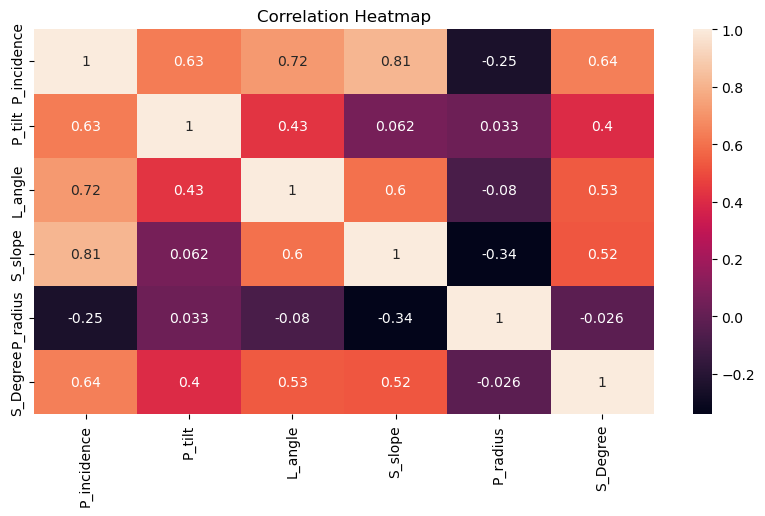

In [23]:
# Heatmap to understand correlation between all features
plt.figure(figsize = (10,5))
plt.title('Correlation Heatmap')
plt.xticks(rotation=90)
sns.heatmap(df.corr(), annot=True);

It is observed that 'S_slope' and 'P_incidence' have the strongest positive correlation of 0.81.

'S_slope' and 'P_radius' have the strongest negative correlation of -0.34.

'P_radius' and 'L_angle' have a weak negative correlation of -0.08.

'L_angle' and 'P_incidence' have a moderate positive correlation of 0.72.

'P_radius' and 'P_tilt' have a weak positive correlation of 0.033.

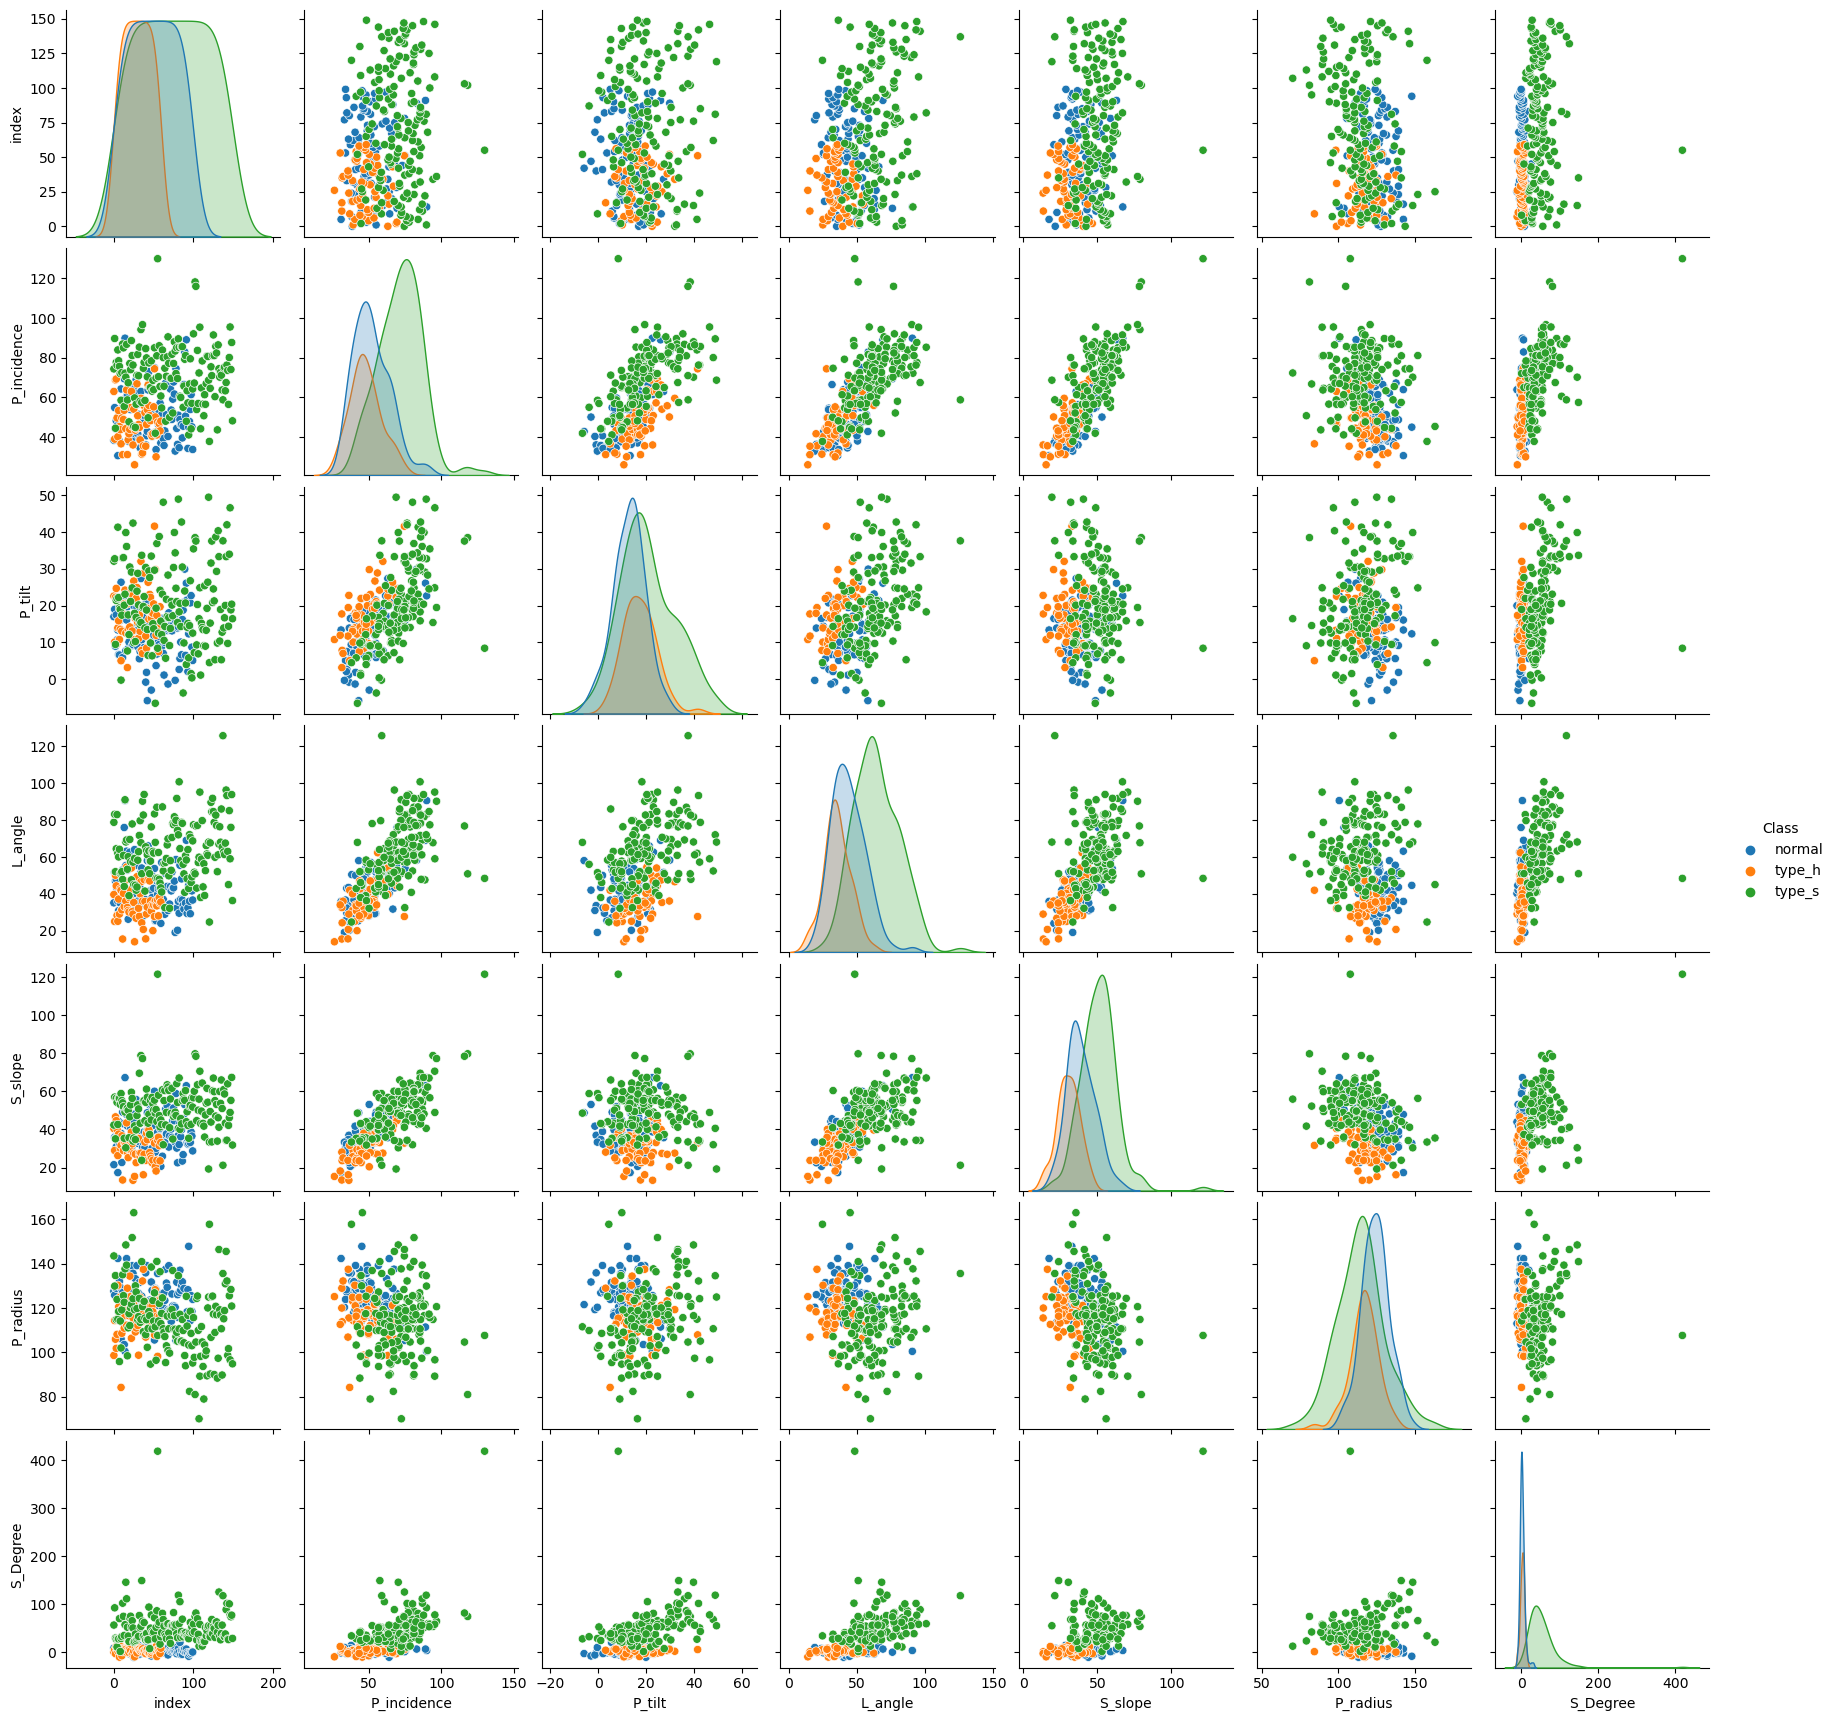

In [24]:
# Pairplot with 3 Classes distinguished by colors
df_new = df
df_new.reset_index(level=0, inplace=True)
sns.pairplot(data = df_new, hue = 'Class');

The distribution of 'normal' class is higher than 'type_h' class. 'type_s' class is more spread than the other 2 classes.

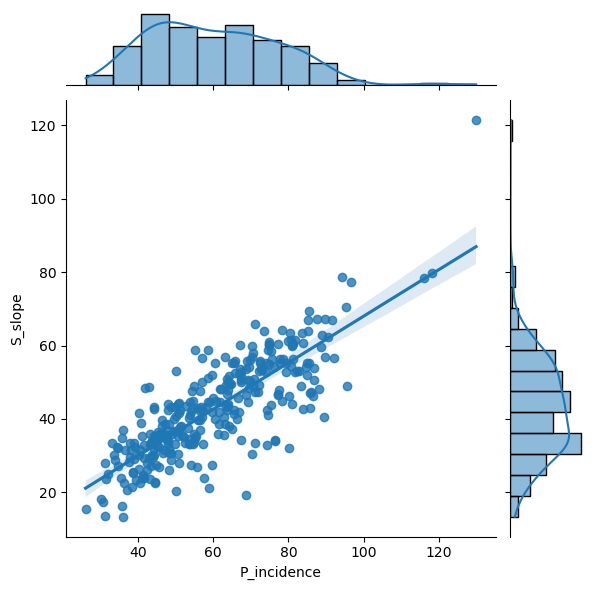

In [25]:
# Jointplot for ‘P_incidence’ and ‘S_slope’ 
sns.jointplot(data = df_new, x = 'P_incidence', y = 'S_slope', kind = 'reg');

All points are close to the line of best fit. Therefore, the correlation is almost linear. 

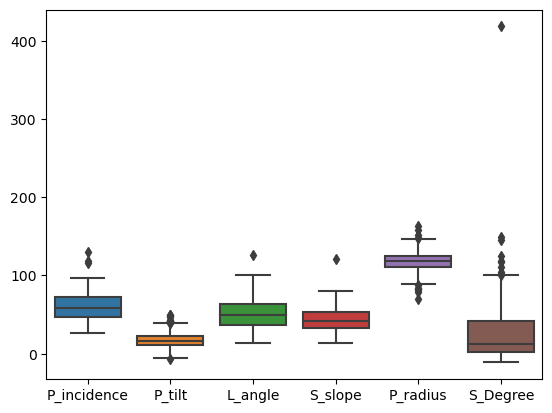

In [26]:
# Boxplot to check distribution of features
columns = ['P_incidence','P_tilt','L_angle','S_slope','P_radius','S_Degree']
sns.boxplot(data = df[columns]);

There are outliers in all features.

'S_Degree' is highly skewed to the right.

4. Model Building

In [27]:
# Splitting data into X and Y (independent and dependent variables)
X = df.drop(columns = 'Class')
y = df['Class']

In [28]:
X.head()

,index,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
0,0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683
1,1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642
2,2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195
3,3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941
4,4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910


In [29]:
y.head()

0    normal
1    normal
2    normal
3    normal
4    normal
Name: Class, dtype: object

In [30]:
# Splitting data into train and test with 80:20 proportion
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10)

In [31]:
# Scaling independent variables
scaler = RobustScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

The data is now scaled.

In [32]:
# Training a Supervised Learning Classification base model using KNN classifier
# n_neighbors = 9
knn = KNeighborsClassifier(n_neighbors = 9)
# Fitting the model
knn.fit(X_train, y_train)
# Predicting the response
y_pred = knn.predict(X_test)
# Accuracy
print('Accuracy on Training data:{:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy on Test data:{:.2f}'.format(knn.score(X_test, y_test)))

Accuracy on Training data:0.90
Accuracy on Test data:0.77


Confusion Matrix


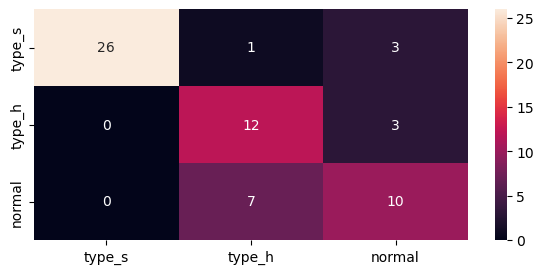

In [33]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, y_pred, labels=["type_s", "type_h","normal"])

df_cm = pd.DataFrame(cm, index = [i for i in ["type_s", "type_h","normal"]],
                  columns = [i for i in ["type_s", "type_h","normal"]])
plt.figure(figsize = (7,3))
sns.heatmap(df_cm, annot=True);

There are 4 misclassifications for 'type_s'. There are 3 misclassifications for 'type_h'. There are 7 misclassifications for 'normal'.

In [34]:
print('Classification  Matrix:\n',classification_report(y_test,y_pred))

Classification  Matrix:
               precision    recall  f1-score   support

      normal       0.62      0.59      0.61        17
      type_h       0.60      0.80      0.69        15
      type_s       1.00      0.87      0.93        30

    accuracy                           0.77        62
   macro avg       0.74      0.75      0.74        62
weighted avg       0.80      0.77      0.78        62



5. Performance Improvement

In [35]:
# Creating an odd list of k for knn
myList = list(range(1,50))

# Subsetting just the odd numbers
neighbors = list(filter(lambda x: x % 2 != 0, myList))

In [36]:
# Empty list that will hold accuracy scores
ac_scores = []

# Perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # Predict the response
    y_pred = knn.predict(X_test)
    # Evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)

# Changing to misclassification error
MSE = [1 - x for x in ac_scores]

# Determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 19


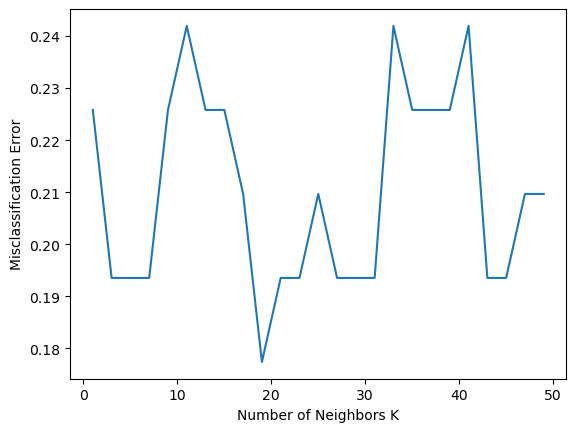

In [37]:
# Plotting misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [38]:
#Use k=19 as the final model for prediction
knn = KNeighborsClassifier(n_neighbors = 19)

# Fitting the model
knn.fit(X_train, y_train)

# Predicting the response
y_pred = knn.predict(X_test)

# Accuracy
print('Accuracy on Training data:{:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy on Test data:{:.2f}'.format(knn.score(X_test, y_test)))

Accuracy on Training data:0.88
Accuracy on Test data:0.82


Confusion Matrix


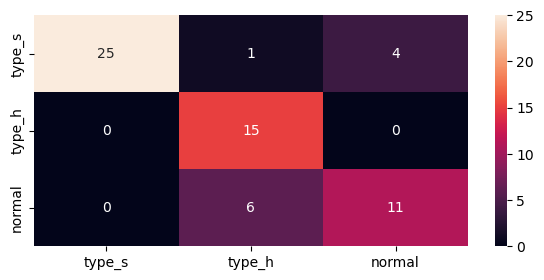

In [39]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, y_pred, labels=["type_s", "type_h","normal"])

df_cm = pd.DataFrame(cm, index = [i for i in ["type_s", "type_h","normal"]],
                  columns = [i for i in ["type_s", "type_h","normal"]])
plt.figure(figsize = (7,3))
sns.heatmap(df_cm, annot=True);

There are 5 misclassifications for 'type_s'. There are 0 misclassifications for 'type_h'. There are 6 misclassifications for 'normal'.

In [40]:
print('Classification  Matrix:\n',classification_report(y_test,y_pred))

Classification  Matrix:
               precision    recall  f1-score   support

      normal       0.73      0.65      0.69        17
      type_h       0.68      1.00      0.81        15
      type_s       1.00      0.83      0.91        30

    accuracy                           0.82        62
   macro avg       0.81      0.83      0.80        62
weighted avg       0.85      0.82      0.82        62



Accuracy was 77% and is now 82%. There is 5% improvement.

Precision was 62%, 60% and 100% for 'normal', 'type_h' and 'type_s' and is now 73%, 68% and 100% respectively. There is 11%, 8% and 0% improvement respectively.

F1 score was 61%, 69% and 93% for 'normal', 'type_h' and 'type_s' and is now 69%, 81% and 91% respectively. There is 8%, 12% and -2% improvement respectively.

The value of k contributed the most in improving the performance of the model. The values obtained for precision, recall and F1 score were also good. Using the robust scaler also helped in improving the performance since all features had outliers and robust scaler helped in dealing with that. 

PART B

1. Data Understanding and Preparation

In [41]:
# Reading both datasets 'data1' and 'data2' and storing them into separate variables
data1 = pd.read_csv("C:/Users/ruhee/OneDrive/Desktop/AIML/Part2+-+Data1.csv")
data2 = pd.read_csv("C:/Users/ruhee/OneDrive/Desktop/AIML/Part2+-Data2.csv")

In [42]:
# Printing the first 5 rows of both datasets
print(data1.head())
print(data2.head())

   ID  Age  CustomerSince  HighestSpend  ZipCode  HiddenScore  \
0   1   25              1            49    91107            4   
1   2   45             19            34    90089            3   
2   3   39             15            11    94720            1   
3   4   35              9           100    94112            1   
4   5   35              8            45    91330            4   

   MonthlyAverageSpend  Level  
0                  1.6      1  
1                  1.5      1  
2                  1.0      1  
3                  2.7      2  
4                  1.0      2  
   ID  Mortgage  Security  FixedDepositAccount  InternetBanking  CreditCard  \
0   1         0         1                    0                0           0   
1   2         0         1                    0                0           0   
2   3         0         0                    0                0           0   
3   4         0         0                    0                0           0   
4   5         0       

In [43]:
# Printing the shape of data1 and data2
print('There are', data1.shape[0], 'rows and', data1.shape[1], 'columns in data1.')
print('There are', data2.shape[0], 'rows and', data2.shape[1], 'columns in data2.')

There are 5000 rows and 8 columns in data1.
There are 5000 rows and 7 columns in data2.


In [44]:
# Printing the column names of data1 and data2
print(data1.columns)
print(data2.columns)

Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level'],
      dtype='object')
Index(['ID', 'Mortgage', 'Security', 'FixedDepositAccount', 'InternetBanking',
       'CreditCard', 'LoanOnCard'],
      dtype='object')


In [45]:
# Printing the datatypes of data1 and data2
print(data1.dtypes)
print(data2.dtypes)

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
dtype: object
ID                       int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object


In [46]:
# Merging both the datasets on 'ID' feature
data = pd.merge(data1, data2, on='ID')

In [47]:
# Checking the first 5 rows of the combined dataset
data.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN


In [48]:
# Checking the shape of the combined dataset
data.shape

(5000, 14)

In [49]:
# Changing datatype of below features to 'object'
columns = ['CreditCard', 'InternetBanking', 'FixedDepositAccount', 'Security', 'Level', 'HiddenScore']
data[columns] = data[columns].astype('object')

In [50]:
# Checking the datatypes of all features
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   object 
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   object 
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   object 
 10  FixedDepositAccount  5000 non-null   object 
 11  InternetBanking      5000 non-null   object 
 12  CreditCard           5000 non-null   object 
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(6), object(6)
memory usage: 585.9+ KB


2. Data Exploration and Analysis

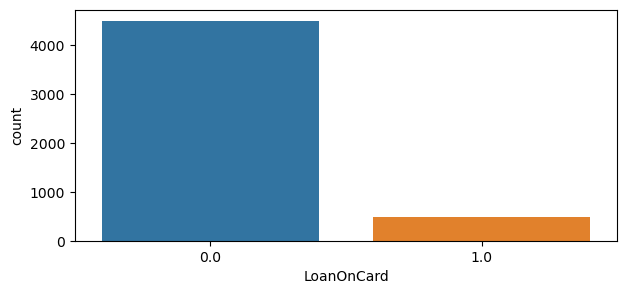

In [51]:
# Countplot for distribution of Target variable 'LoanOnCard'
plt.figure(figsize = (7,3))
sns.countplot(data = data, x = 'LoanOnCard');

Data is highly imbalanced. Most customers do not have a loan on their card.

In [52]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
CustomerSince,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
HighestSpend,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZipCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
MonthlyAverageSpend,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
LoanOnCard,4980.0,0.096386,0.295149,0.0,0.00,0.0,0.00,1.0


In [53]:
# Checking presence of missing values
print(data.isnull().sum())

ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64


There are 20 missing values in 'LoanOnCard'.

In [54]:
# Checking percentage of missing values
print(data.isnull().sum()* 100 / len(data))

ID                     0.0
Age                    0.0
CustomerSince          0.0
HighestSpend           0.0
ZipCode                0.0
HiddenScore            0.0
MonthlyAverageSpend    0.0
Level                  0.0
Mortgage               0.0
Security               0.0
FixedDepositAccount    0.0
InternetBanking        0.0
CreditCard             0.0
LoanOnCard             0.4
dtype: float64


It is best to drop the missing values.

In [55]:
# Dropping all rows with missing values
data.dropna(subset = ['LoanOnCard'], axis = 0, inplace=True)

In [56]:
data['LoanOnCard'].value_counts()

0.0    4500
1.0     480
Name: LoanOnCard, dtype: int64

In [57]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,4980.0,2510.345382,1438.011129,10.0,1265.75,2510.5,3755.250,5000.0
Age,4980.0,45.352610,11.464212,23.0,35.00,45.0,55.000,67.0
CustomerSince,4980.0,20.117671,11.468716,-3.0,10.00,20.0,30.000,43.0
HighestSpend,4980.0,73.852410,46.070090,8.0,39.00,64.0,98.000,224.0
ZipCode,4980.0,93152.420482,2123.660073,9307.0,91911.00,93407.0,94608.000,96651.0
MonthlyAverageSpend,4980.0,1.939536,1.750006,0.0,0.70,1.5,2.525,10.0
Mortgage,4980.0,56.589759,101.836758,0.0,0.00,0.0,101.000,635.0
LoanOnCard,4980.0,0.096386,0.295149,0.0,0.00,0.0,0.000,1.0


In [58]:
data.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
9,10,34,9,180,93023,1,8.9,3,0,0,0,0,0,1.0
10,11,65,39,105,94710,4,2.4,3,0,0,0,0,0,0.0
11,12,29,5,45,90277,3,0.1,2,0,0,0,1,0,0.0
12,13,48,23,114,93106,2,3.8,3,0,1,0,0,0,0.0
13,14,59,32,40,94920,4,2.5,2,0,0,0,1,0,0.0


In [59]:
# list of all categorical variables
cat_col = data.select_dtypes(include="object").columns.tolist()

# printing the number of occurrences of each unique value in each categorical column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

1    1466
2    1293
4    1215
3    1006
Name: HiddenScore, dtype: int64
--------------------------------------------------
1    2089
3    1496
2    1395
Name: Level, dtype: int64
--------------------------------------------------
0    4460
1     520
Name: Security, dtype: int64
--------------------------------------------------
0    4678
1     302
Name: FixedDepositAccount, dtype: int64
--------------------------------------------------
1    2974
0    2006
Name: InternetBanking, dtype: int64
--------------------------------------------------
0    3514
1    1466
Name: CreditCard, dtype: int64
--------------------------------------------------


There are no unexpected values in any of the categorical variables.

3. Data Preparation and Model building

In [60]:
# Dropping 'ID' and 'ZipCode'
data = data.drop('ID', axis = 1)
data = data.drop('ZipCode', axis = 1)

In [61]:
# Checking 5 first rows of the dataset
data.head()

,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
9,34,9,180,1,8.9,3,0,0,0,0,0,1.0
10,65,39,105,4,2.4,3,0,0,0,0,0,0.0
11,29,5,45,3,0.1,2,0,0,0,1,0,0.0
12,48,23,114,2,3.8,3,0,1,0,0,0,0.0
13,59,32,40,4,2.5,2,0,0,0,1,0,0.0


In [62]:
# Splitting data into X and Y (independent and dependent variables)
X = data.drop(columns='LoanOnCard')
y = data['LoanOnCard']

In [63]:
# Splitting data into train and test with 75:25 proportion
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [64]:
# Train a Supervised Learning Classification base model using Logistic Regression
model = LogisticRegression()
# Fitting the model
model.fit(X_train, y_train)
# Predicting the response
y_pred = model.predict(X_test)
# Accuracy
print('Accuracy on Training data:{:.2f}'.format(model.score(X_train, y_train)))
print('Accuracy on Test data:{:.2f}'.format(model.score(X_test, y_test)))

Accuracy on Training data:0.95
Accuracy on Test data:0.96


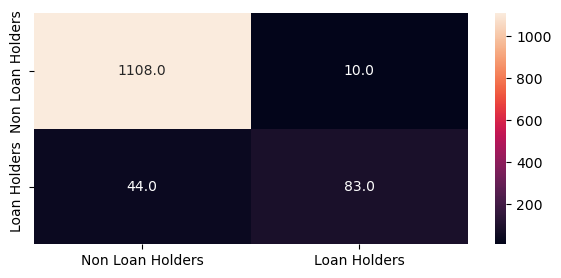

In [65]:
cm = confusion_matrix(y_test, y_pred, labels = [0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ['Non Loan Holders', 'Loan Holders']],
                    columns = [i for i in ['Non Loan Holders', 'Loan Holders']])
plt.figure(figsize = (7,3))
sns.heatmap(df_cm, annot = True, fmt = '.1f');

Type I error is 44. (44 false positives)

Type II error is 10. (10 false negatives)

In [66]:
print('Classification  Matrix:\n',classification_report(y_test,y_pred))

Classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.96      0.99      0.98      1118
         1.0       0.89      0.65      0.75       127

    accuracy                           0.96      1245
   macro avg       0.93      0.82      0.87      1245
weighted avg       0.95      0.96      0.95      1245



Precision for non loan holders is 96% and loan holders is 89%. 

Recall for non loan holders is 99% and loan holders is 65%.

F1 score for non loan holders is 98% and loan holders is 75%.

Accuracy is 96%.

In [67]:
# Balancing the data
smote_nc = SMOTENC(categorical_features=[1, 3, 5], random_state=30)
x_s, y_s = smote_nc.fit_resample(X, y)

In [68]:
# Target variable before sampling
y.value_counts()

0.0    4500
1.0     480
Name: LoanOnCard, dtype: int64

In [69]:
# Target variable after sampling
y_s.value_counts()

1.0    4500
0.0    4500
Name: LoanOnCard, dtype: int64

Target variable is now balanced.

In [70]:
# Splitting balanced data into train and test with 75:25 proportion
X_train, X_test, y_train, y_test = train_test_split(x_s, y_s, test_size=0.25, random_state=10)

In [71]:
# Training previous model with balanced data
model = LogisticRegression()
# Fitting the model
model.fit(X_train, y_train)
# Predicting the response
y_pred = model.predict(X_test)
# Accuracy
print('Accuracy on Training data:{:.2f}'.format(model.score(X_train, y_train)))
print('Accuracy on Test data:{:.2f}'.format(model.score(X_test, y_test)))

Accuracy on Training data:0.89
Accuracy on Test data:0.90


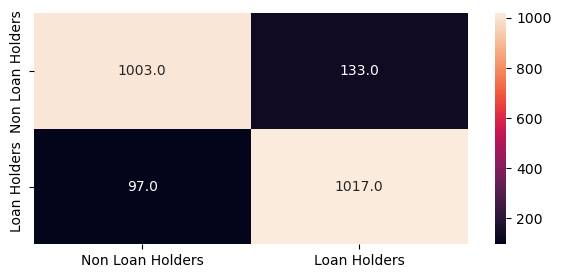

In [72]:
cm = confusion_matrix(y_test, y_pred, labels = [0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ['Non Loan Holders', 'Loan Holders']],
                    columns = [i for i in ['Non Loan Holders', 'Loan Holders']])
plt.figure(figsize = (7,3))
sns.heatmap(df_cm, annot = True, fmt = '.1f');

Type I error is 97. (97 false positives)

Type II error is 133. (133 false negatives)

In [73]:
print('Classification  Matrix:\n',classification_report(y_test,y_pred))

Classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.91      0.88      0.90      1136
         1.0       0.88      0.91      0.90      1114

    accuracy                           0.90      2250
   macro avg       0.90      0.90      0.90      2250
weighted avg       0.90      0.90      0.90      2250



Precision has dropped after balancing the data but recall has improved. F1 score has also improved. 

4. Performance Improvement

In [74]:
# Splitting balanced data into train and test with 75:25 proportion
X_train, X_test, y_train, y_test = train_test_split(x_s, y_s, test_size = 0.25, random_state = 10)
# Training a base model on balanced data using SVM
clf = svm.SVC(gamma = 0.25, C = 10)
# Fitting the model
clf.fit(X_train , y_train)
# Predicting the response
y_pred = clf.predict(X_test)
# Accuracy
print('Accuracy on Training data:{:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy on Test data:{:.2f}'.format(clf.score(X_test, y_test)))

Accuracy on Training data:1.00
Accuracy on Test data:0.85


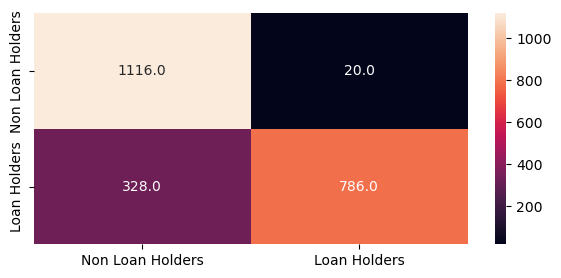

In [75]:
cm = confusion_matrix(y_test, y_pred, labels = [0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ['Non Loan Holders', 'Loan Holders']],
                    columns = [i for i in ['Non Loan Holders', 'Loan Holders']])
plt.figure(figsize = (7,3))
sns.heatmap(df_cm, annot = True, fmt = '.1f');

Type I error is 328. (328 false positives)

Type II error is 20. (20 false negatives)

In [76]:
print('Classification  Matrix:\n',classification_report(y_test,y_pred))

Classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.77      0.98      0.87      1136
         1.0       0.98      0.71      0.82      1114

    accuracy                           0.85      2250
   macro avg       0.87      0.84      0.84      2250
weighted avg       0.87      0.85      0.84      2250



In [77]:
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')

Area Under Curve: 0.8439799479100817


In [78]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10], 
              'gamma': [0.1, 0.01, 0.001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.755 total time=   4.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.750 total time=   4.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.770 total time=   3.7s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.757 total time=   3.6s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.752 total time=   3.7s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.876 total time=   2.3s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.858 total time=   2.0s
[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.873 total time=   1.9s
[CV 4/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.856 total time=   2.1s
[CV 5/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.887 total time=   2.0s
[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.870 total time=   1.1s
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf;,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=3)

In [79]:
# Printing the best parameter after tuning
print(grid.best_params_)
  
# Printing how the model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=10, gamma=0.01)


Using SVM model with C = 10 and gamma = 0.01, we get the highest accuracy score.

In [80]:
# Splitting balanced data into train and test with 75:25 proportion
X_train, X_test, y_train, y_test = train_test_split(x_s, y_s, test_size = 0.25, random_state = 10)
# Training the final model on balanced data using SVM
clf = svm.SVC(gamma = 0.01, C = 10)
# Fitting the model
clf.fit(X_train , y_train)
# Predicting the response
y_pred = clf.predict(X_test)
# Accuracy
print('Accuracy on Training data:{:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy on Test data:{:.2f}'.format(clf.score(X_test, y_test)))

Accuracy on Training data:0.99
Accuracy on Test data:0.96


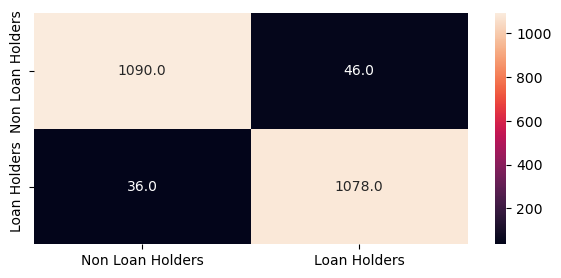

In [81]:
cm = confusion_matrix(y_test, y_pred, labels = [0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ['Non Loan Holders', 'Loan Holders']],
                    columns = [i for i in ['Non Loan Holders', 'Loan Holders']])
plt.figure(figsize = (7,3))
sns.heatmap(df_cm, annot = True, fmt = '.1f');

Type I error is 36. (36 false positives)

Type II error is 46. (46 false negatives)

In [82]:
print('Classification  Matrix:\n',classification_report(y_test,y_pred))

Classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.97      0.96      0.96      1136
         1.0       0.96      0.97      0.96      1114

    accuracy                           0.96      2250
   macro avg       0.96      0.96      0.96      2250
weighted avg       0.96      0.96      0.96      2250



In [83]:
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')

Area Under Curve: 0.9635955318987534


In [84]:
# Splitting balanced data into train and test with 75:25 proportion
X_train, X_test, y_train, y_test = train_test_split(x_s, y_s, test_size = 0.25, random_state = 10)
# Training a base model on balanced data using KNN
knn = KNeighborsClassifier()
#Training the model
knn.fit(X_train, y_train)
#Predicting the model
y_pred = knn.predict(X_test)
# Accuracy
print('Accuracy on Training data:{:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy on Test data:{:.2f}'.format(knn.score(X_test, y_test)))

Accuracy on Training data:0.95
Accuracy on Test data:0.93


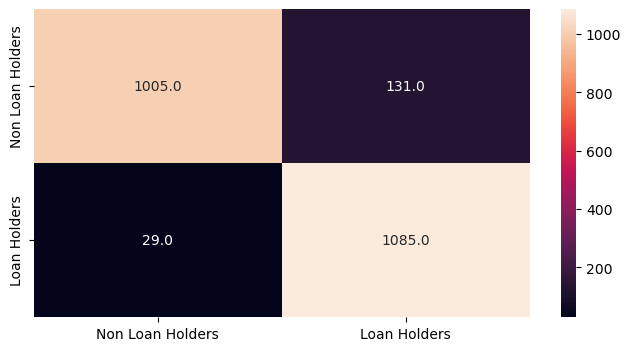

In [85]:
cm = confusion_matrix(y_test, y_pred, labels = [0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ['Non Loan Holders', 'Loan Holders']],
                    columns = [i for i in ['Non Loan Holders', 'Loan Holders']])
plt.figure(figsize = (8,4))
sns.heatmap(df_cm, annot = True, fmt = '.1f');

Type I error is 29. (29 false positives)

Type II error is 131. (131 false negatives)

In [86]:
print('Classification  Matrix:\n',classification_report(y_test,y_pred))

Classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.97      0.88      0.93      1136
         1.0       0.89      0.97      0.93      1114

    accuracy                           0.93      2250
   macro avg       0.93      0.93      0.93      2250
weighted avg       0.93      0.93      0.93      2250



In [87]:
# Creating an odd list of k for knn
myList = list(range(1,50))

# Subsetting just the odd numbers
neighbors = list(filter(lambda x: x % 2 != 0, myList))

In [88]:
# Empty list that will hold accuracy scores
ac_scores = []

# Perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # Predict the response
    y_pred = knn.predict(X_test)
    # Evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)

# Changing to misclassification error
MSE = [1 - x for x in ac_scores]

# Determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 1


In [89]:
#Use k=1 as the final model for prediction
knn = KNeighborsClassifier(n_neighbors = 1)

# Fitting the model
knn.fit(X_train, y_train)

# Predicting the response
y_pred = knn.predict(X_test)

# Accuracy
print('Accuracy on Training data:{:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy on Test data:{:.2f}'.format(knn.score(X_test, y_test)))

Accuracy on Training data:1.00
Accuracy on Test data:0.95


It is observed that both the final models SVM and KNN performed better than the base model. 

KNN model has an improvement of 2%.

SVM model has an improvement of 11%.